# Ralatório de Análise VII

## Criando Agrupamentos

In [31]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Configurando o tamanho do gráfico

plt.rc("figure", figsize = (20, 10))


In [15]:
dados = pd.read_csv("Dados/aluguel_residencial.csv", sep = ";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [16]:
# Criando uma lista com todos os bairros

bairros = dados.Bairro.unique()



In [17]:
# Criando um novo data frame que contém todos os bairros da lista e visualindo os vlaores sem duplicatas. Nesta caso abaixo
# vamos retornar o mesmo data frame, mas caso quiséssemos utilizar uma outra lista poderíamos usar os comandos abaixo

selecao = dados["Bairro"].isin(bairros)
dados = dados[selecao]
dados["Bairro"].drop_duplicates()


0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
4               Cachambi
              ...       
13855          Bancários
15277         Cavalcanti
15280       Rio da Prata
15412      Cidade Jardim
16428        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [18]:
# Criando o agrupamento por bairros

grupo_bairro = dados.groupby("Bairro")

In [19]:
# Visualizando os grupos

grupo_bairro.groups

{'Abolição': [1553, 3184, 6655, 6951, 7634, 10138, 13165, 14187, 16054, 16639, 17139, 18797, 18805, 20106, 21387], 'Alto da Boa Vista': [2201, 12039, 12556, 13240, 13438, 14518], 'Anchieta': [3017, 8880, 15660, 17811], 'Andaraí': [384, 452, 514, 613, 790, 846, 854, 996, 1191, 1416, 1421, 1685, 1912, 2014, 2683, 3137, 3216, 3489, 3578, 3738, 3856, 4227, 4572, 4773, 4876, 4883, 4961, 5545, 5753, 5990, 6232, 6450, 6529, 6911, 7168, 7408, 7889, 7890, 8064, 8430, 9190, 9290, 9334, 9380, 9713, 9929, 10104, 10255, 10275, 10859, 10940, 10947, 11079, 11516, 11818, 12292, 12762, 13243, 13385, 13389, 13769, 13897, 13931, 13938, 14214, 14592, 14668, 15915, 16009, 16504, 16509, 16599, 16654, 17510, 17769, 17794, 17913, 18212, 18433, 18754, 18888, 18918, 19041, 19668, 19750, 19770, 20100, 20219, 20516, 20866, 21028, 21074, 21114, 21326, 21455, 21543, 21582], 'Anil': [241, 572, 604, 1227, 1632, 1664, 1789, 1932, 2127, 2378, 3586, 3675, 3860, 4153, 4369, 4651, 4769, 4790, 5261, 5340, 5660, 6130, 6150,

In [21]:
# Realiando os cálculos da média do valor e condominio por bairro

grupo_bairro[["Valor", "Condominio" ]].mean().round()

,Valor,Condominio
Bairro,,
Abolição,1195.0,191.0
Alto da Boa Vista,3967.0,885.0
Anchieta,875.0,20.0
Andaraí,1465.0,498.0
Anil,2049.0,456.0
...,...,...
Vila Valqueire,1770.0,277.0
Vila da Penha,1261.0,233.0
Vista Alegre,1114.0,210.0


In [22]:
# Exercício

alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

# Como devemos proceder para obter um DataFrame com as notas médias dos alunos, com duas casas decimais, segundo seu sexo?

In [24]:
# Correta

sexo = alunos.groupby("Sexo")
sexo = pd.DataFrame(sexo["Notas"].mean().round(2))
sexo.columns = ["Notas Médias"]
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatísticas Descritivas

In [26]:
# Visualizando dados decritivos do data frame

grupo_bairro["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [28]:
# Realizando operações específicas e mudando o rótulo das colunas

grupo_bairro["Valor"].aggregate(["min", "max"]).rename(columns = {"min": "Mínimo", "max": "Máximo"})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairros')

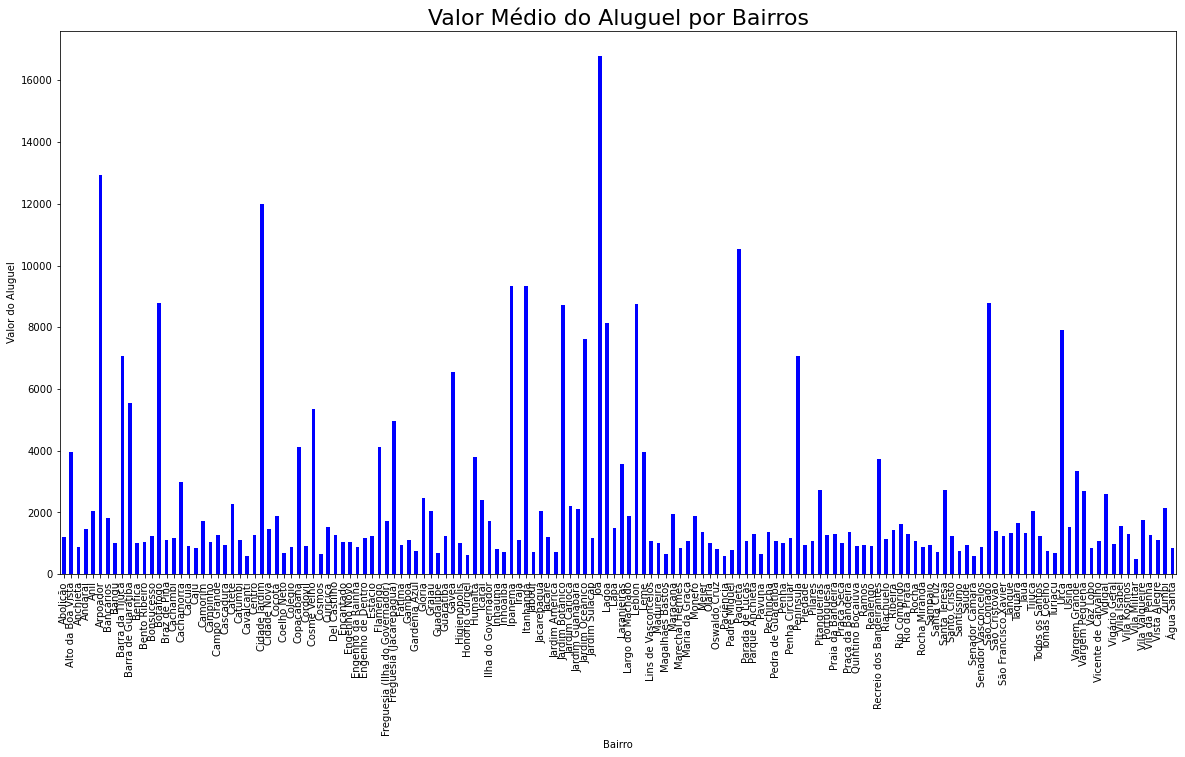

In [37]:
# PLotando o gráfico de barras do desvido padrão

fig = grupo_bairro["Valor"].mean().plot.bar(color = "blue")
fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairros", {"fontsize": 22})


In [59]:
# Exercícios

precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos


,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [55]:
produtos = precos.groupby("Produto").describe().round(2)
produtos

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [60]:
produtos = precos.groupby("Produto")

In [61]:
# Correto

estatistica = ["mean", "std", "min", "max"]
nome = {"mean" : "Média", "std" : "Desvio Padrão", "min" : "Mínimo", "max" : "Máximo"}

produto = produtos["Preço"].aggregate(estatistica).round(2).rename(columns = nome)
produto

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
